## Week 5: Clustering and Segmenting Calgary and Vancouver

##### By Nicholas Olusegun Ibitokun
##### 11th April 2021

In [1]:
# IMPORTING ALL REQUIRED LIBRARIES

import pandas as pd 
import numpy as np 
import requests
from geopy.geocoders import Nominatim # transform address into latitude and longitude values
from pandas.io.json import json_normalize # convert json file to dataframe
!pip install folium
import folium # for plotting
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install arcgis

print('ALL REQUIRED LIBRARIES IMPORTED.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ALL REQUIRED LIBRARIES IMPORTED.


### Import Calgary Data from URL

In [2]:
# Scrape Wikipedia webpage for Calgary Postal Codes, boroughs and neighborhoods
url_cal='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'

calgary_url = requests.get(url_cal)

calgary_data = pd.read_html(calgary_url.text)
calgary_data = calgary_data[1]
calgary_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413


### Calgary Data Processing & Cleaning

In [3]:
#Selecting ONLY the Calgary Boroughs 
df_=calgary_data[calgary_data['Borough'].str.contains('Calgary')]
df_calgary=df_.reset_index(drop=True)

# Correct Column Header by Removing Space
df_calgary = df_calgary.rename(columns = {'Postal Code':'PostalCode'}) 

# Drop row with geospatial data missing
df_calgary.drop(df_calgary.loc[df_calgary['Latitude']=='Not assigned'].index, inplace=True)

df_calgary

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.0809,-114.1616
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.0388,-114.098
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.0227,-114.1342
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796


In [4]:
df_calgary.shape

(34, 5)

### Import Vancouver Data from processed CSV obtained from Wikipedia URL

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_df9fcba42773418890ebdd804a8bec54 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_df9fcba42773418890ebdd804a8bec54 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_df9fcba42773418890ebdd804a8bec54 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vzawog3heSbMID9Zsv7rBW-dC2XoIGV8rDgbYbhSrpPM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_df9fcba42773418890ebdd804a8bec54)

body = client_df9fcba42773418890ebdd804a8bec54.get_object(Bucket='courseracapstone-donotdelete-pr-pcnpcuoqyyrhzg',Key='British_Columbia_Postal_Codes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

BC_data = pd.read_csv(body)
BC_data.head()

,PostalCode,Borough,Neighborhood
0,V1A,Kimberley,Kimberley
1,V1B,Vernon,East
2,V1C,Cranbrook,Cranbrook
3,V1E,Salmon Arm,Salmon Arm
4,V1G,Dawson Creek,Dawson Creek


In [6]:
BC_data.shape

(181, 3)

### Vancouver Data Processing & Cleaning

In [7]:
#Selecting ONLY the Boroughs with Vancouver in the name
df2=BC_data[BC_data['Borough'].str.contains('Vancouver')]
df_vancouver=df2.reset_index(drop=True)
df_vancouver

,PostalCode,Borough,Neighborhood
0,V5K,Vancouver,North Hastings-Sunrise
1,V5L,Vancouver,North Grandview-Woodland
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling..."
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar..."
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview"
5,V5R,Vancouver,South Renfrew-Collingwood
6,V5S,Vancouver,Killarney
7,V5T,Vancouver,East Mount Pleasant
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-..."
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-..."


### Obtain Geopatial Data (Longitude & Latitude) for Vancouver Neighborhoods

In [8]:
from arcgis.geocoding import geocode
from arcgis.gis import GIS
gis = GIS()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [9]:
#Defining function to extract longitude and latitudes from Arcgis
def get_x_y_can(pcode):
   lat_coords = 0
   lng_coords = 0
   g = geocode(address='{}, Vancouver, Canada, CAN'.format(pcode))[0]
   lng_coords = g['location']['x']
   lat_coords = g['location']['y']
   return str(lat_coords) +","+ str(lng_coords)

vancouver_postalcodes = df_vancouver['PostalCode']    
vancouver_coordinates = vancouver_postalcodes.apply(lambda x: get_x_y_can(x))


lat_van = vancouver_coordinates.apply(lambda x: x.split(',')[0])
lng_van = vancouver_coordinates.apply(lambda x: x.split(',')[1])

vancouver_new = pd.concat([df_vancouver,lat_van.astype(float), lng_van.astype(float)], axis=1)
vancouver_new.columns= ['PostalCode','Borough','Neighborhood','Latitude','Longitude']
vancouver_new

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.281670,-123.039980
1,V5L,Vancouver,North Grandview-Woodland,49.280700,-123.066840
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.254750,-123.023670
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.254420,-123.066800
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.222930,-123.066880
5,V5R,Vancouver,South Renfrew-Collingwood,49.239960,-123.041130
6,V5S,Vancouver,Killarney,49.215370,-123.041120
7,V5T,Vancouver,East Mount Pleasant,49.262970,-123.091650
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-...",49.248430,-123.090560
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-...",49.232010,-123.091390


In [10]:
vancouver_new.shape

(44, 5)

### Visualisation of the Neighborhoods of Calgary and Vancouver

In [11]:
calgary = geocode(address='Calgary, Canada, CAN')[0]
calgary_lng_coords = calgary['location']['x']
calgary_lat_coords = calgary['location']['y']


vancouver = geocode(address='Vancouver, Canada, CAN')[0]
vancouver_lng_coords = vancouver['location']['x']
vancouver_lat_coords = vancouver['location']['y']

print("Calagary Longitude is", calgary_lng_coords,"and " "Calagary Latitude is", calgary_lat_coords )
print("Vanvouver Longitude is", vancouver_lng_coords,"and " "Vancouver Latitude is", vancouver_lat_coords )

Calagary Longitude is -114.06300999999996 and Calagary Latitude is 51.04532000000006
Vanvouver Longitude is -123.12582999999995 and Vancouver Latitude is 49.27994000000007


In [12]:
# Creating map of Calgary

map_Calgary = folium.Map(location=[calgary_lat_coords, calgary_lng_coords], zoom_start=11)
map_Calgary


# adding markers to map
for Latitude, Longitude, Borough, Neighborhood in zip(df_calgary['Latitude'], df_calgary['Longitude'], df_calgary['Borough'], df_calgary['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Calgary)  
    
map_Calgary

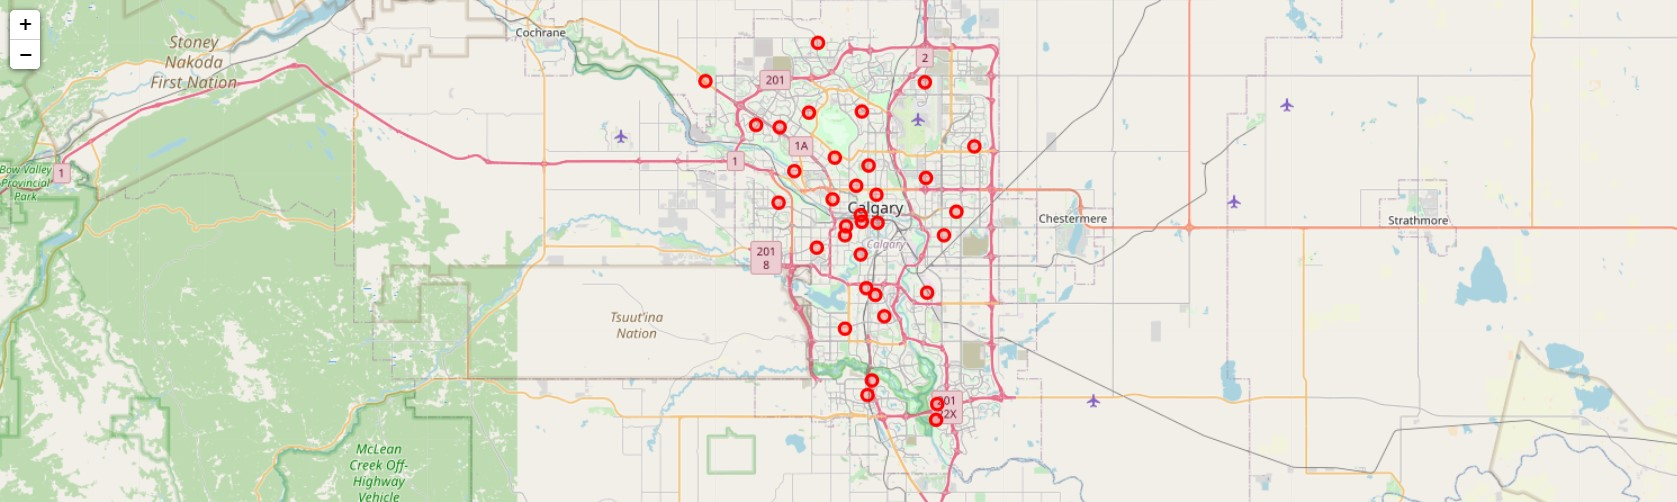

In [13]:
# Creating map of Vanvouver

map_Vancouver = folium.Map(location=[vancouver_lat_coords, vancouver_lng_coords], zoom_start=12)
map_Vancouver


# adding markers to map
for Latitude, Longitude, Borough, Neighborhood in zip(vancouver_new['Latitude'], vancouver_new['Longitude'], vancouver_new['Borough'], vancouver_new['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True
        ).add_to(map_Vancouver)  
    
map_Vancouver

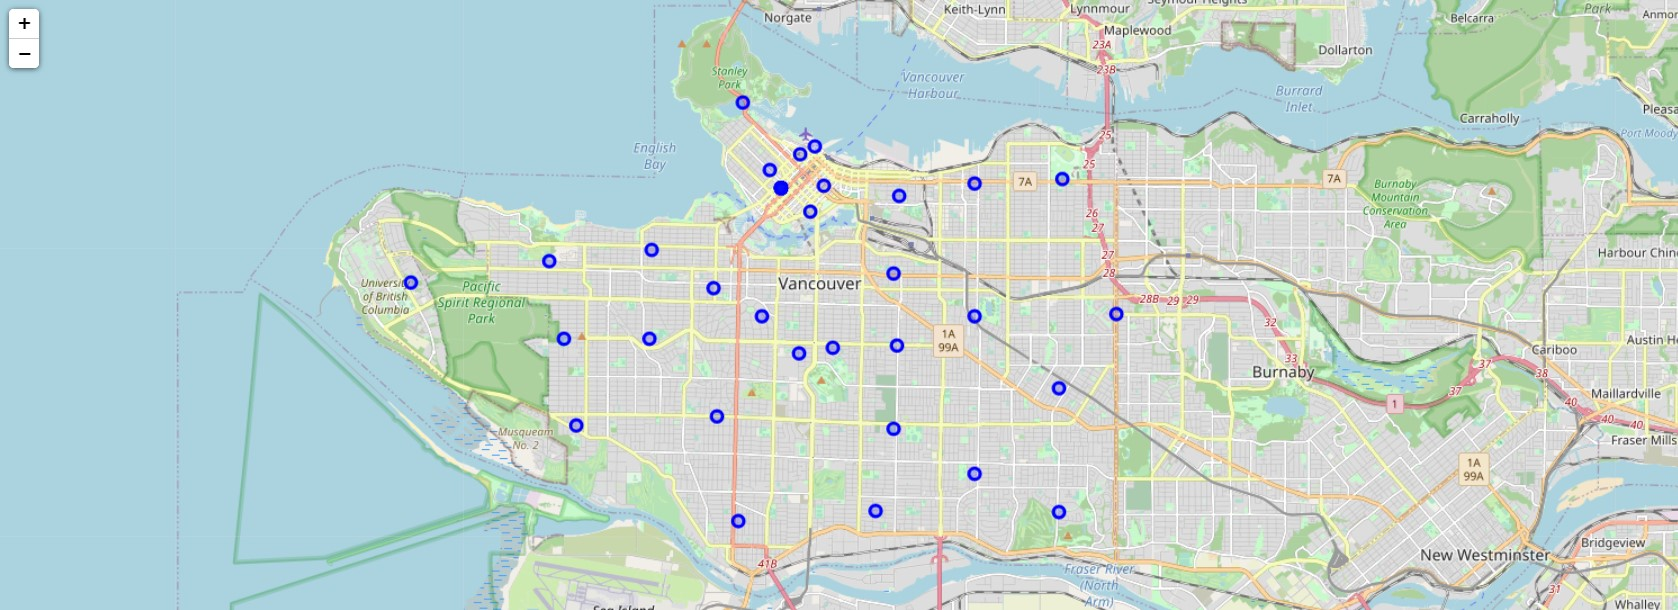

### Foursquare API (Obtaining the details of Venues in Calgary & Vancouver)

In [14]:
# Fourquare developer credentials

CLIENT_ID = 'XV0BMPZDTBXRQSJ5WIV1AZRPKQ2YOIFDMSEFBFO1UYL3CMXP' 
CLIENT_SECRET = 'R2XITGOMXXAOKS4V52NLS0XZJLSS1UDO2TGGTTFT25TTBGYE'
VERSION = '20180605' # Foursquare API version

LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

calgary_venues = getNearbyVenues(df_calgary['Neighborhood'], df_calgary['Latitude'], df_calgary['Longitude'])
calgary_venues.head()

Penbrooke Meadows, Marlborough
Dalhousie, Edgemont, Hamptons, Hidden Valley
Forest Lawn, Dover, Erin Woods
Montgomery, Bowness, Silver Springs, Greenwood
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Bridgeland, Greenview, Zoo, YYC
Lakeview, Glendale, Killarney, Glamorgan
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
Highfield, Burns Industrial
Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge
Queensland, Lake Bonavista, Willow Park, Acadia
Martindale, Taradale, Falconridge, Saddle Ridge
Thorncliffe, Tuxedo Park
Sandstone, MacEwan Glen, Beddington, Harvest Hills, Coventry Hills, Panorama Hills
Brentwood, Collingwood, Nose Hill
Tuscany, Scenic Acres
Mount Pleasant, Capitol Hill, Banff Trail
Cranston, Auburn Bay, Mahogany
Kensington, Westmont, Parkdale, University
Northeast Calgary
City Centre, Calgary To

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,TD Canada Trust,Bank
1,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,7-Eleven,Convenience Store
2,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,7-Eleven,Convenience Store
3,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Lucky Supermarket,Grocery Store
4,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Gong Kee BBQ Noodle House,Noodle House


In [15]:
calgary_venues.shape

(677, 5)

In [16]:
vancouver_venues = getNearbyVenues(vancouver_new['Neighborhood'], vancouver_new['Latitude'], vancouver_new['Longitude'])
vancouver_venues.head()

North Hastings-Sunrise
North Grandview-Woodland
South Hastings-Sunrise , North Renfrew-Collingwood
South Grandview-Woodland , NE Kensington-Cedar Cottage
SE Kensington-Cedar Cottage , Victoria-Fraserview
South Renfrew-Collingwood
Killarney
East Mount Pleasant
West Kensington-Cedar Cottage , NE Riley Park-Little Mountain
SE Riley Park-Little Mountain , SW Kensington-Cedar Cottage , NE Oakridge , North Sunset
SE Oakridge , East Marpole , South Sunset
West Mount Pleasant , West Riley Park-Little Mountain
East Fairview , South Cambie
Strathcona , Chinatown , Downtown Eastside
NE Downtown , Gastown , Harbour Centre , International Village , Victory Square , Yaletown
Waterfront , Coal Harbour , Canada Place
SE West End , Davie Village
NW West End , Stanley Park
West Fairview , Granville Island , NE Shaughnessy
NW Shaughnessy , East Kitsilano , Quilchena
Central Kitsilano , Greektown
NW Arbutus Ridge , NE Dunbar-Southlands
South Shaughnessy , NW Oakridge , NE Kerrisdale , SE Arbutus Ridge
Wes

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,North Hastings-Sunrise,49.28167,-123.03998,The Fair at the PNE,Fair
1,North Hastings-Sunrise,49.28167,-123.03998,Livestock Barns,Farm
2,North Hastings-Sunrise,49.28167,-123.03998,Wooden Roller Coaster,Theme Park Ride / Attraction
3,North Hastings-Sunrise,49.28167,-123.03998,Pacific Coliseum,Hockey Arena
4,North Hastings-Sunrise,49.28167,-123.03998,Playland,Theme Park


In [17]:
vancouver_venues.shape

(2686, 5)

In [18]:
# Grouping Calgary Venues

calgary_venues.groupby('Venue Category').max()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue
Venue Category,,,,
American Restaurant,"Rundle, Whitehorn, Monterey Park",51.1494,-114.1616,Thomsons Restaurant
Art Gallery,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,(MOCA) Museum Of Contemporary Art of Calgary
Asian Restaurant,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",51.126060,-114.143158,Zen 8 Grill
Athletics & Sports,South Calgary (Altadore / Bankview / Richmond),51.0316,-114.0994,Visions Sports Center
Automotive Shop,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Kal Tire
...,...,...,...,...
Vegetarian / Vegan Restaurant,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0426,-114.0791,The Coup
Vietnamese Restaurant,"Thorncliffe, Tuxedo Park",51.127,-114.1815,Van Son Vietnamese Cuisine
Wine Shop,"Lakeview, Glendale, Killarney, Glamorgan",51.0415,-114.1342,Vine Arts Wine & Spirits


In [19]:
# Grouping Vancouver Venues
vancouver_venues.groupby('Venue Category').max()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue
Venue Category,,,,
Accessories Store,"Waterfront , Coal Harbour , Canada Place",49.288173,-123.115557,Herschel Supply Co. Gastown
African Restaurant,"South Grandview-Woodland , NE Kensington-Cedar...",49.296860,-123.066800,Simba's Grill
American Restaurant,"Waterfront , Coal Harbour , Canada Place",49.288173,-123.039980,West Oak
Amphitheater,North Hastings-Sunrise,49.281670,-123.039980,PNE Amphitheatre
Aquarium,"NW West End , Stanley Park",49.296860,-123.137590,Vancouver Aquarium
...,...,...,...,...
Wine Bar,Pacific Centre,49.280400,-123.112850,The Wine Bar
Wine Shop,West,49.283560,-123.125830,Viti Wine & Lager
Women's Store,"SE West End , Davie Village",49.286540,-123.112850,Oak+Fort


### One Hot Encoding to improve Clustering

In [20]:
# For Calgary
calgary_venue_cat = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep="")

calgary_venue_cat['Neighborhood'] = calgary_venues['Neighborhood'] 

# moving neighborhood column to the first column
fixed_columns = [calgary_venue_cat.columns[-1]] + list(calgary_venue_cat.columns[:-1])
calgary_venue_cat = calgary_venue_cat[fixed_columns]

calgary_venue_cat.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,...,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#For Vancouver

vancouver_venue_cat = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")


vancouver_venue_cat['Neighborhood'] = vancouver_venues['Neighborhood'] 
# moving neighborhood column to the first column
fixed_columns = [vancouver_venue_cat.columns[-1]] + list(vancouver_venue_cat.columns[:-1])
vancouver_venue_cat = vancouver_venue_cat[fixed_columns]

vancouver_venue_cat.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Mean Values of Venues

In [22]:

calgary_grouped = calgary_venue_cat.groupby('Neighborhood').mean().reset_index()
calgary_grouped.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,...,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000
1,"Brentwood, Collingwood, Nose Hill",0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000
2,"Bridgeland, Greenview, Zoo, YYC",0.0,0.0,0.021739,0.0,0.0,0.021739,0.000000,0.021739,0.021739,...,0.0,0.0,0.00,0.0,0.021739,0.00,0.043478,0.0,0.0,0.000000
3,"City Centre, Calgary Tower",0.0,0.0,0.000000,0.0,0.0,0.000000,0.036364,0.000000,0.072727,...,0.0,0.0,0.00,0.0,0.000000,0.00,0.018182,0.0,0.0,0.036364
4,"Connaught, West Victoria Park",0.0,0.0,0.000000,0.0,0.0,0.000000,0.020000,0.010000,0.040000,...,0.0,0.0,0.02,0.0,0.000000,0.01,0.030000,0.0,0.0,0.010000


In [23]:
vancouver_grouped = vancouver_venue_cat.groupby('Neighborhood').mean().reset_index()
vancouver_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Bentall Centre,0.0,0.0,0.030000,0.0,0.0,0.01,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.01,0.0,0.000000,0.010000,0.020000,0.0
1,"Central Kitsilano , Greektown",0.0,0.0,0.013158,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.0,0.026316,0.013158,0.0,0.00,0.0,0.026316,0.013158,0.013158,0.0
2,East Central,0.0,0.0,0.000000,0.0,0.0,0.01,0.000000,0.0,0.0,...,0.0,0.000000,0.010000,0.0,0.00,0.0,0.010000,0.000000,0.010000,0.0
3,"East Fairview , South Cambie",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.0,0.000000,0.033333,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0
4,East Mount Pleasant,0.0,0.0,0.014706,0.0,0.0,0.00,0.029412,0.0,0.0,...,0.0,0.014706,0.044118,0.0,0.00,0.0,0.000000,0.000000,0.014706,0.0


### Most Common Venues in Calgary and Vancouver

In [24]:
# Code included to rearrange table based on most common or popular venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        

# create a new dataframe for Calgary
calgary_sorted = pd.DataFrame(columns=columns)
calgary_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    calgary_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

calgary_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Braeside, Cedarbrae, Woodbine",Pizza Place,Pool,Gas Station,Coffee Shop,Convenience Store,Gym,Pub,Ice Cream Shop,Hockey Arena,Pharmacy
1,"Brentwood, Collingwood, Nose Hill",Coffee Shop,Dog Run,Building,Hockey Rink,Sporting Goods Shop,Yoga Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
2,"Bridgeland, Greenview, Zoo, YYC",Chinese Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pub,Park,Sandwich Place,Scenic Lookout,Noodle House,Fast Food Restaurant,Coffee Shop
3,"City Centre, Calgary Tower",Bar,Pub,Coffee Shop,Middle Eastern Restaurant,Mediterranean Restaurant,Italian Restaurant,French Restaurant,Restaurant,Steakhouse,Sushi Restaurant
4,"Connaught, West Victoria Park",Restaurant,Pub,Coffee Shop,Bar,Italian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Brewery,Café,Gift Shop


In [25]:
# create a new dataframe for Vancouver
vancouver_sorted = pd.DataFrame(columns=columns)
vancouver_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    vancouver_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

vancouver_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Hotel,Restaurant,Café,Steakhouse,Plaza,Clothing Store,Coffee Shop,Cosmetics Shop,Dessert Shop,American Restaurant
1,"Central Kitsilano , Greektown",Coffee Shop,Park,Food Truck,Japanese Restaurant,Café,Spa,Deli / Bodega,Bank,Bakery,Toy / Game Store
2,East Central,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
3,"East Fairview , South Cambie",Coffee Shop,Bus Stop,Chinese Restaurant,Bubble Tea Shop,Park,Bank,Sporting Goods Shop,Juice Bar,Outdoor Sculpture,Sandwich Place
4,East Mount Pleasant,Coffee Shop,Pizza Place,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,Bakery,Gym,Breakfast Spot,Arts & Crafts Store,Ethiopian Restaurant


## Clustering using K-Means

In [26]:
# Clustering of Calgary Neighborhoods

# set number of clusters
k_num_clusters = 5
calgary_grouped_clustering = calgary_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans_calgary = KMeans(n_clusters=k_num_clusters, random_state=0).fit(calgary_grouped_clustering)

#Adjusting the cluster labels to start from 1
calgary_sorted.insert(0, 'Cluster Label', kmeans_calgary.labels_ +1)

# Merging table with earlier dataset
calgary_final_data = df_calgary
calgary_final_data = calgary_final_data.join(calgary_sorted.set_index('Neighborhood'), on='Neighborhood')
calgary_cluster = calgary_final_data.dropna(subset=['Cluster Label'])
calgary_cluster

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,2,Convenience Store,Vietnamese Restaurant,Noodle House,Bank,Grocery Store,Yoga Studio,Filipino Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,2,Gas Station,Asian Restaurant,Convenience Store,Café,Yoga Studio,Flea Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,2,Convenience Store,Sandwich Place,Smoke Shop,Coffee Shop,Indonesian Restaurant,Fried Chicken Joint,Falafel Restaurant,Bar,Frozen Yogurt Shop,French Restaurant
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.0809,-114.1616,2,Clothing Store,Coffee Shop,Restaurant,Park,American Restaurant,Men's Store,Shopping Mall,Furniture / Home Store,Luggage Store,Snack Place
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,1,Pizza Place,Theater,Clothing Store,Convenience Store,Diner,Eastern European Restaurant,Dog Run,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.0388,-114.098,2,Mexican Restaurant,Pub,Vietnamese Restaurant,Pizza Place,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Grocery Store,Cosmetics Shop,Bookstore
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614,2,Chinese Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pub,Park,Sandwich Place,Scenic Lookout,Noodle House,Fast Food Restaurant,Coffee Shop
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.0227,-114.1342,2,Bowling Alley,Japanese Restaurant,Sports Bar,Sandwich Place,Supermarket,Sushi Restaurant,Pizza Place,Bakery,Chinese Restaurant,School
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,2,Hotel,Coffee Shop,Restaurant,Pub,Theater,Music Venue,Steakhouse,Performing Arts Venue,Italian Restaurant,Sandwich Place
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796,1,Pizza Place,Convenience Store,Miscellaneous Shop,Donut Shop,Flea Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [27]:
# Clustering of Vancouver Neighborhoods

# set number of clusters
k1_num_clusters = 5
vancouver_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans_vancouver = KMeans(n_clusters=k1_num_clusters, random_state=0).fit(vancouver_grouped_clustering)

#Adjusting the cluster labels to start from 1
vancouver_sorted.insert(0, 'Cluster Label', kmeans_vancouver.labels_ +1)

#merging table with earlier dataset
vancouver_data = vancouver_new
vancouver_data = vancouver_data.join(vancouver_sorted.set_index('Neighborhood'), on='Neighborhood')
vancouver_cluster = vancouver_data.dropna(subset=['Cluster Label'])
vancouver_cluster

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K,Vancouver,North Hastings-Sunrise,49.281670,-123.039980,1,Theme Park Ride / Attraction,Park,Vietnamese Restaurant,Coffee Shop,Beer Garden,Event Space,Theme Park,Pizza Place,Sandwich Place,Stadium
1,V5L,Vancouver,North Grandview-Woodland,49.280700,-123.066840,1,Coffee Shop,Brewery,Café,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Breakfast Spot,Theater,Pizza Place
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.254750,-123.023670,1,Coffee Shop,Sandwich Place,Indian Restaurant,Chinese Restaurant,Latin American Restaurant,Fast Food Restaurant,Burger Joint,Candy Store,Bank,Bus Stop
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.254420,-123.066800,1,Café,Park,Sushi Restaurant,Lake,Bookstore,Diner,Liquor Store,Skating Rink,Farmers Market,Beach
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.222930,-123.066880,4,Pizza Place,Motorcycle Shop,Sushi Restaurant,Park,Convenience Store,Gas Station,Bus Station,Vietnamese Restaurant,Grocery Store,Asian Restaurant
5,V5R,Vancouver,South Renfrew-Collingwood,49.239960,-123.041130,4,Asian Restaurant,Chinese Restaurant,Park,Bus Stop,Metro Station,Plaza,Sandwich Place,Gift Shop,Bar,Coffee Shop
6,V5S,Vancouver,Killarney,49.215370,-123.041120,4,Bus Stop,Chinese Restaurant,Bank,Fast Food Restaurant,Shopping Mall,Deli / Bodega,Liquor Store,Farmers Market,Sushi Restaurant,Sandwich Place
7,V5T,Vancouver,East Mount Pleasant,49.262970,-123.091650,1,Coffee Shop,Pizza Place,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,Bakery,Gym,Breakfast Spot,Arts & Crafts Store,Ethiopian Restaurant
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-...",49.248430,-123.090560,1,Coffee Shop,Park,Vietnamese Restaurant,Bakery,Pie Shop,Pizza Place,Chinese Restaurant,Sandwich Place,Shoe Store,Café
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-...",49.232010,-123.091390,4,Chinese Restaurant,Park,Pizza Place,Bus Stop,Bakery,Dessert Shop,Coffee Shop,Field,Fast Food Restaurant,Sandwich Place


### Generating Maps of the Clustered Neighborhoods

In [28]:
# Visualising Calgary Clustered Neighborhoods

calgary_cluster_map = folium.Map(location=[calgary_lat_coords, calgary_lng_coords], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calgary_cluster['Latitude'], calgary_cluster['Longitude'], calgary_cluster['Borough'], calgary_cluster['Cluster Label']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(calgary_cluster_map)
        
calgary_cluster_map

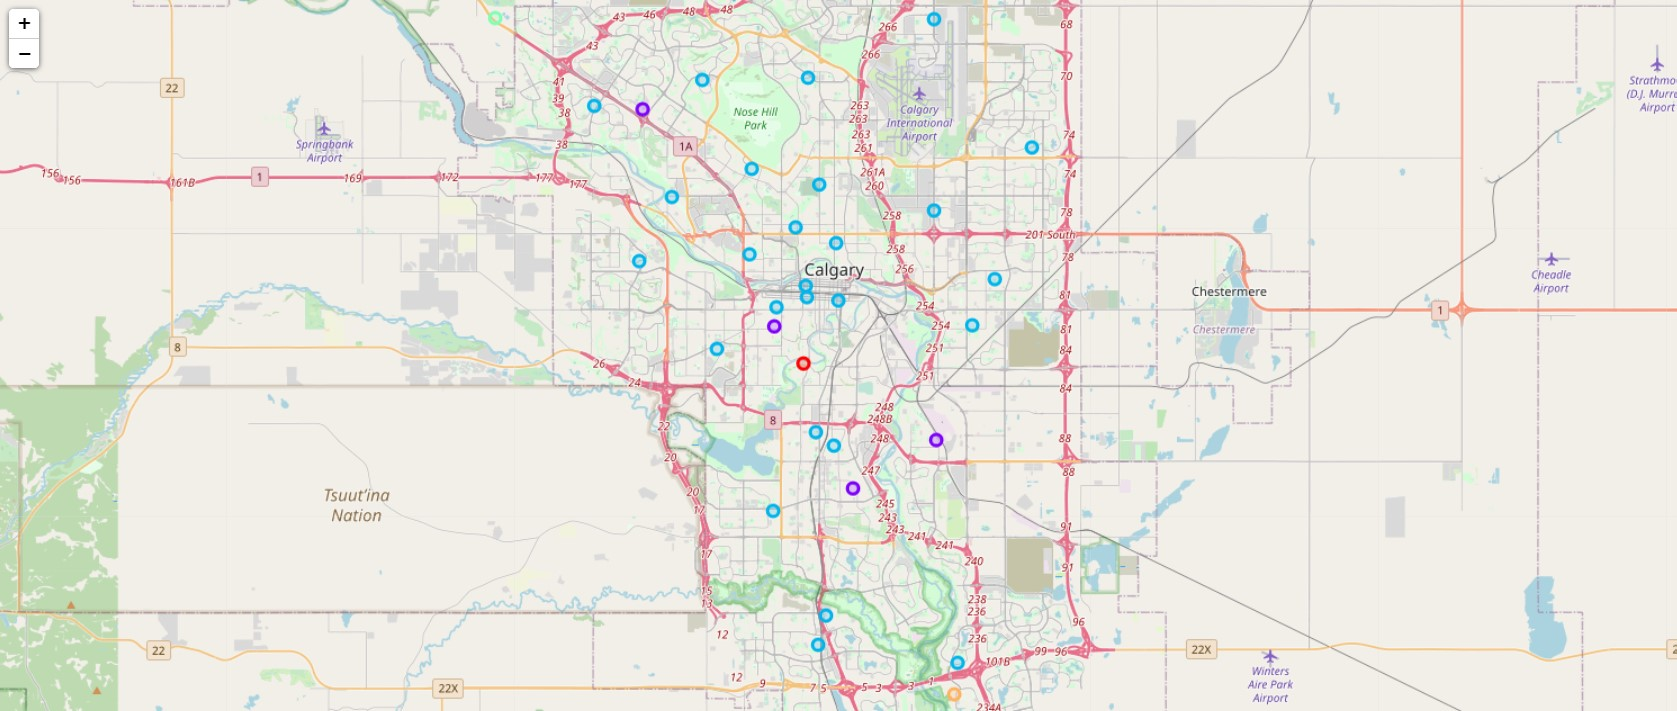

In [29]:
# Visualising Vancouver Clustered Neighborhoods

vancouver_cluster_map = folium.Map(location=[vancouver_lat_coords, vancouver_lng_coords], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_cluster['Latitude'], vancouver_cluster['Longitude'], vancouver_cluster['Borough'], vancouver_cluster['Cluster Label']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(vancouver_cluster_map)
        
vancouver_cluster_map

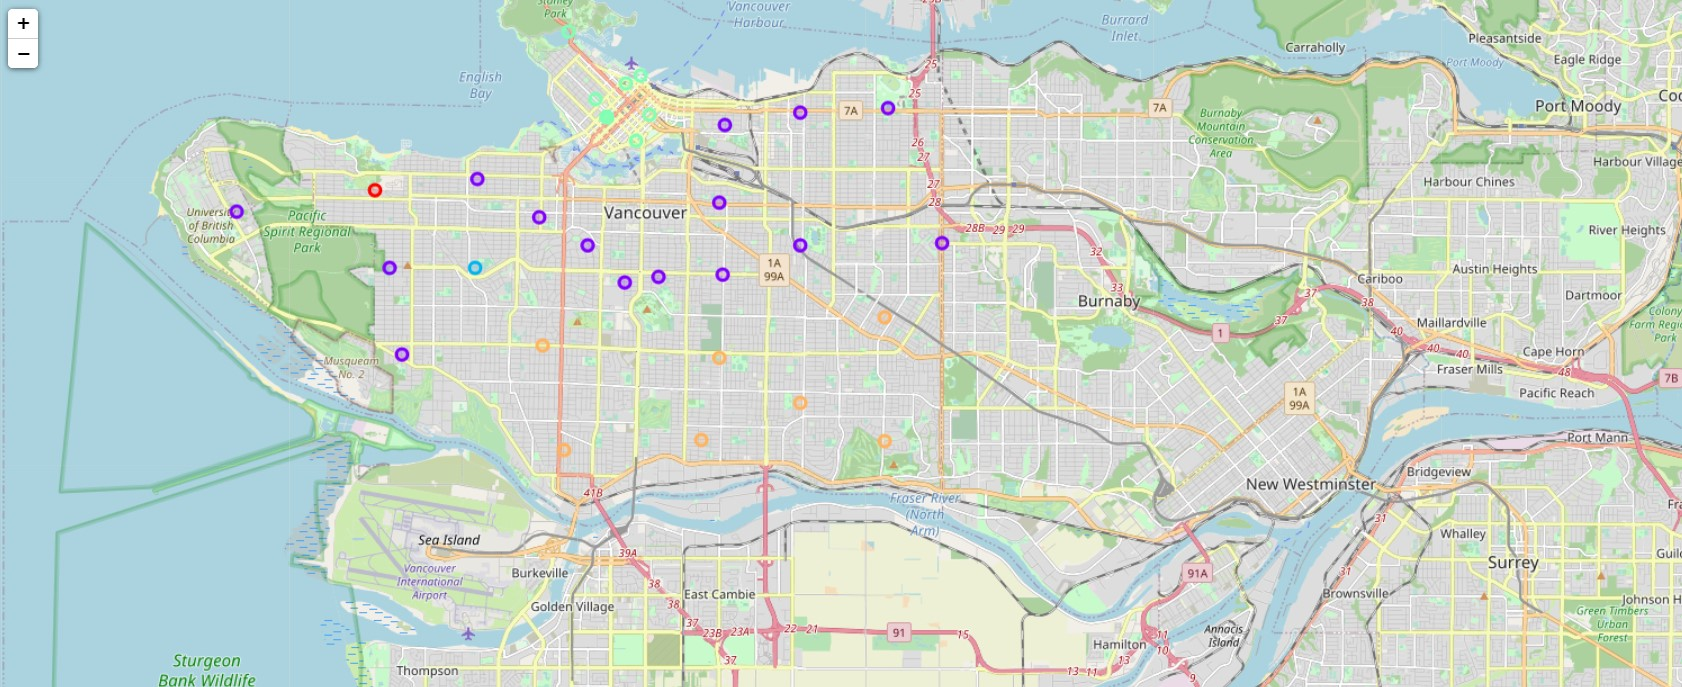

### Reviewing Clusters

### Calgary Clusters

#### Calgary Cluster 1

In [30]:
calgary_cluster.loc[calgary_cluster['Cluster Label'] == 1, calgary_cluster.columns[[2] + list(range(5, calgary_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",1,Pizza Place,Theater,Clothing Store,Convenience Store,Diner,Eastern European Restaurant,Dog Run,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
9,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",1,Pizza Place,Convenience Store,Miscellaneous Shop,Donut Shop,Flea Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
12,"Queensland, Lake Bonavista, Willow Park, Acadia",1,Pizza Place,Convenience Store,Chinese Restaurant,Construction & Landscaping,Insurance Office,Dry Cleaner,Flea Market,Frozen Yogurt Shop,Donut Shop,Fried Chicken Joint
28,South Calgary (Altadore / Bankview / Richmond),1,Pizza Place,Health & Beauty Service,Convenience Store,Coffee Shop,Candy Store,Café,Spa,Pet Store,Athletics & Sports,Fried Chicken Joint


#### Calagary Cluster 2

In [31]:
calgary_cluster.loc[calgary_cluster['Cluster Label'] == 2, calgary_cluster.columns[[2] + list(range(5, calgary_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Penbrooke Meadows, Marlborough",2,Convenience Store,Vietnamese Restaurant,Noodle House,Bank,Grocery Store,Yoga Studio,Filipino Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
1,"Dalhousie, Edgemont, Hamptons, Hidden Valley",2,Gas Station,Asian Restaurant,Convenience Store,Café,Yoga Studio,Flea Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
2,"Forest Lawn, Dover, Erin Woods",2,Convenience Store,Sandwich Place,Smoke Shop,Coffee Shop,Indonesian Restaurant,Fried Chicken Joint,Falafel Restaurant,Bar,Frozen Yogurt Shop,French Restaurant
3,"Montgomery, Bowness, Silver Springs, Greenwood",2,Clothing Store,Coffee Shop,Restaurant,Park,American Restaurant,Men's Store,Shopping Mall,Furniture / Home Store,Luggage Store,Snack Place
5,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",2,Mexican Restaurant,Pub,Vietnamese Restaurant,Pizza Place,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Grocery Store,Cosmetics Shop,Bookstore
6,"Bridgeland, Greenview, Zoo, YYC",2,Chinese Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pub,Park,Sandwich Place,Scenic Lookout,Noodle House,Fast Food Restaurant,Coffee Shop
7,"Lakeview, Glendale, Killarney, Glamorgan",2,Bowling Alley,Japanese Restaurant,Sports Bar,Sandwich Place,Supermarket,Sushi Restaurant,Pizza Place,Bakery,Chinese Restaurant,School
8,"Inglewood, Burnsland, Chinatown, East Victoria...",2,Hotel,Coffee Shop,Restaurant,Pub,Theater,Music Venue,Steakhouse,Performing Arts Venue,Italian Restaurant,Sandwich Place
10,"Highfield, Burns Industrial",2,American Restaurant,Gas Station,Grocery Store,Coffee Shop,Pub,Sporting Goods Shop,Sandwich Place,Bookstore,Sushi Restaurant,Korean Restaurant
11,"Discovery Ridge, Signal Hill, West Springs, Ch...",2,Bar,Trail,Convenience Store,Gas Station,Vietnamese Restaurant,Donut Shop,Filipino Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint


#### Calgary Cluster 3

In [32]:
calgary_cluster.loc[calgary_cluster['Cluster Label'] == 3, calgary_cluster.columns[[2] + list(range(5, calgary_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Northwest Calgary,3,Flea Market,Yoga Studio,Diner,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop


#### Calgary Cluster 4

In [33]:
calgary_cluster.loc[calgary_cluster['Cluster Label'] == 4, calgary_cluster.columns[[2] + list(range(5, calgary_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,"Cranston, Auburn Bay, Mahogany",4,Pizza Place,Playground,Cosmetics Shop,Liquor Store,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flea Market


#### Calgary Cluster 5

In [34]:
calgary_cluster.loc[calgary_cluster['Cluster Label'] == 5, calgary_cluster.columns[[2] + list(range(5, calgary_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,"Elbow Park, Britannia, Parkhill, Mission",5,Park,Yoga Studio,Filipino Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flea Market


### Vancouver Clusters

#### Vancouver Cluster 1

In [35]:
vancouver_cluster.loc[vancouver_cluster['Cluster Label'] == 1, vancouver_cluster.columns[[2] + list(range(5, vancouver_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Hastings-Sunrise,1,Theme Park Ride / Attraction,Park,Vietnamese Restaurant,Coffee Shop,Beer Garden,Event Space,Theme Park,Pizza Place,Sandwich Place,Stadium
1,North Grandview-Woodland,1,Coffee Shop,Brewery,Café,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Breakfast Spot,Theater,Pizza Place
2,"South Hastings-Sunrise , North Renfrew-Colling...",1,Coffee Shop,Sandwich Place,Indian Restaurant,Chinese Restaurant,Latin American Restaurant,Fast Food Restaurant,Burger Joint,Candy Store,Bank,Bus Stop
3,"South Grandview-Woodland , NE Kensington-Cedar...",1,Café,Park,Sushi Restaurant,Lake,Bookstore,Diner,Liquor Store,Skating Rink,Farmers Market,Beach
7,East Mount Pleasant,1,Coffee Shop,Pizza Place,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,Bakery,Gym,Breakfast Spot,Arts & Crafts Store,Ethiopian Restaurant
8,"West Kensington-Cedar Cottage , NE Riley Park-...",1,Coffee Shop,Park,Vietnamese Restaurant,Bakery,Pie Shop,Pizza Place,Chinese Restaurant,Sandwich Place,Shoe Store,Café
11,"West Mount Pleasant , West Riley Park-Little M...",1,Coffee Shop,Japanese Restaurant,Skating Rink,Café,Arts & Crafts Store,Vegetarian / Vegan Restaurant,Restaurant,Farmers Market,Chinese Restaurant,Dessert Shop
12,"East Fairview , South Cambie",1,Coffee Shop,Bus Stop,Chinese Restaurant,Bubble Tea Shop,Park,Bank,Sporting Goods Shop,Juice Bar,Outdoor Sculpture,Sandwich Place
13,"Strathcona , Chinatown , Downtown Eastside",1,Park,Sandwich Place,Coffee Shop,Restaurant,Brewery,Café,Asian Restaurant,Noodle House,Japanese Restaurant,Cheese Shop
18,"West Fairview , Granville Island , NE Shaughnessy",1,Bus Stop,Breakfast Spot,Sushi Restaurant,Bakery,Historic Site,Bank,Physical Therapist,Park,Coffee Shop,Sandwich Place


#### Vancouver Cluster 2

In [36]:
vancouver_cluster.loc[vancouver_cluster['Cluster Label'] == 2, vancouver_cluster.columns[[2] + list(range(5, vancouver_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"NW Arbutus Ridge , NE Dunbar-Southlands",2,Caribbean Restaurant,Italian Restaurant,Bakery,Food Truck,Zoo Exhibit,Food & Drink Shop,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant


#### Vancouver Cluster 3

In [37]:
vancouver_cluster.loc[vancouver_cluster['Cluster Label'] == 3, vancouver_cluster.columns[[2] + list(range(5, vancouver_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"NE Downtown , Gastown , Harbour Centre , Inter...",3,Hotel,Restaurant,Coffee Shop,Taco Place,Café,Clothing Store,Breakfast Spot,Italian Restaurant,Burger Joint,Plaza
15,"Waterfront , Coal Harbour , Canada Place",3,Hotel,Restaurant,Coffee Shop,Café,Steakhouse,Boat or Ferry,Cosmetics Shop,Bookstore,Plaza,Food Truck
16,"SE West End , Davie Village",3,Hotel,Japanese Restaurant,Bakery,Dessert Shop,Food Truck,Cosmetics Shop,Restaurant,Seafood Restaurant,Gay Bar,Coffee Shop
17,"NW West End , Stanley Park",3,Japanese Restaurant,Hotel,Italian Restaurant,Garden,Noodle House,Korean Restaurant,Coffee Shop,Café,Aquarium,Pub
28,SW Downtown,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
29,Outer East,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
30,Inner East,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
31,East Central,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
32,North Central,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place
33,South Central,3,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Cosmetics Shop,Seafood Restaurant,French Restaurant,Restaurant,Dessert Shop,Sandwich Place


#### Vancouver Cluster 4

In [38]:
vancouver_cluster.loc[vancouver_cluster['Cluster Label'] == 4, vancouver_cluster.columns[[2] + list(range(5, vancouver_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"SE Kensington-Cedar Cottage , Victoria-Fraserview",4,Pizza Place,Motorcycle Shop,Sushi Restaurant,Park,Convenience Store,Gas Station,Bus Station,Vietnamese Restaurant,Grocery Store,Asian Restaurant
5,South Renfrew-Collingwood,4,Asian Restaurant,Chinese Restaurant,Park,Bus Stop,Metro Station,Plaza,Sandwich Place,Gift Shop,Bar,Coffee Shop
6,Killarney,4,Bus Stop,Chinese Restaurant,Bank,Fast Food Restaurant,Shopping Mall,Deli / Bodega,Liquor Store,Farmers Market,Sushi Restaurant,Sandwich Place
9,"SE Riley Park-Little Mountain , SW Kensington-...",4,Chinese Restaurant,Park,Pizza Place,Bus Stop,Bakery,Dessert Shop,Coffee Shop,Field,Fast Food Restaurant,Sandwich Place
10,"SE Oakridge , East Marpole , South Sunset",4,Bus Stop,Indian Restaurant,Restaurant,Burger Joint,Vietnamese Restaurant,Motel,Chinese Restaurant,Sandwich Place,Zoo Exhibit,Fair
22,"South Shaughnessy , NW Oakridge , NE Kerrisdal...",4,Chinese Restaurant,Coffee Shop,Bus Stop,Asian Restaurant,Tea Room,Pharmacy,Fast Food Restaurant,Vietnamese Restaurant,Portuguese Restaurant,Japanese Restaurant
24,"SE Kerrisdale , SW Oakridge , West Marpole",4,Sushi Restaurant,Chinese Restaurant,Bank,Pizza Place,Bus Stop,Coffee Shop,Shanghai Restaurant,Bubble Tea Shop,Massage Studio,Sandwich Place


#### Vancouver Cluster 5

In [39]:
vancouver_cluster.loc[vancouver_cluster['Cluster Label'] == 5, vancouver_cluster.columns[[2] + list(range(5, vancouver_cluster.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,"West Kitsilano , West Point Grey , Jericho",5,Playground,Park,Sandwich Place,Ethiopian Restaurant,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market
